In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
Data=pd.read_csv('House_Price.csv')
print(Data.describe(include='all'))

                  id             date         price      bedrooms  \
count   2.161300e+04            21613  2.161300e+04  21613.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.400881e+05      3.370842   
std     2.876566e+09              NaN  3.671272e+05      0.930062   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           bathrooms   sqft_living      sqft_lot        floors    waterfront  \
count   21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
unique     

In [9]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
print(Data.columns.tolist())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Lets See how the price is distributed in the data.

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


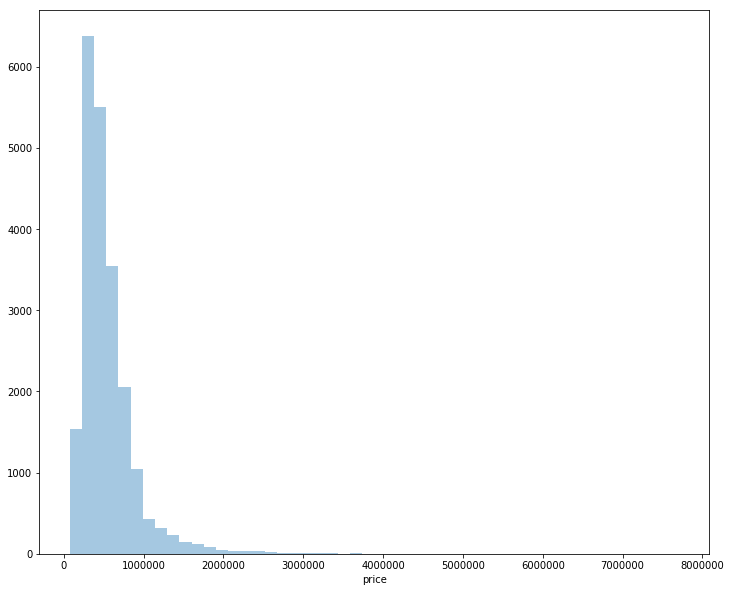

In [18]:
plt.figure(figsize=(12,10))
sns.distplot(Data['price'],kde=False)
plt.show()

Here We See that most of the houses Lie in the range of 0 to 1,000,000$.
<br>Now Let's Try to see how the Price of the houses are affected.

Let's See if the Number of Bedrooms Affect the Price.

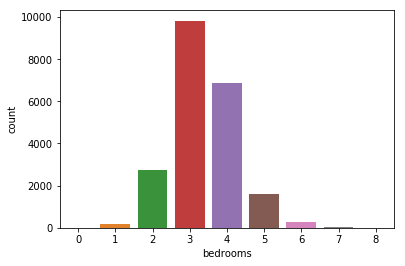

In [47]:
sns.countplot(Data['bedrooms'])
plt.show()

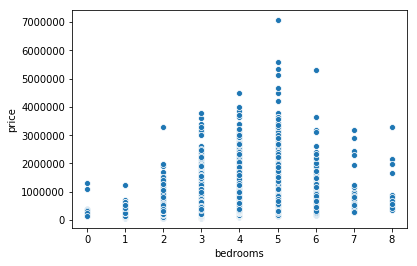

In [48]:
sns.scatterplot(Data['bedrooms'],Data['price'])
plt.show()

From the Above plot we can see that the House with Bedrooms greater than 9 and bathrooms greater than 7 are probably an Outlier.<br>
Hence, We will remove it.

In [46]:
Data=Data[Data['bedrooms']<9]
Data=Data[Data['bathrooms']<7]
print('Removed')

Removed


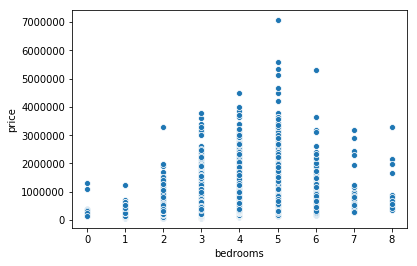

In [49]:
sns.scatterplot(Data['bedrooms'],Data['price'])
plt.show()

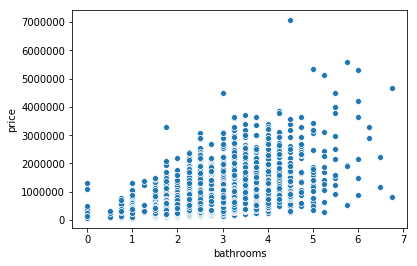

In [51]:
sns.scatterplot(Data['bathrooms'],Data['price'])
plt.show()

c:\users\ajish\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


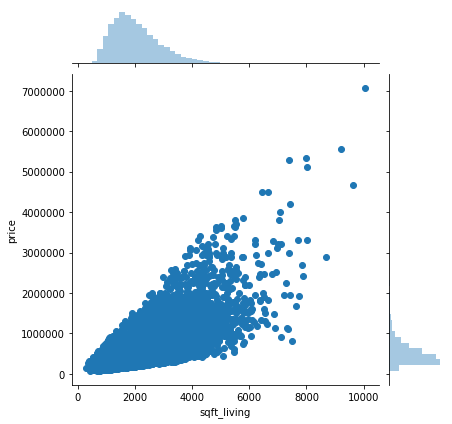

0.6997055026566196


In [57]:
sns.jointplot(Data['sqft_living'],Data['price'])
plt.show()
from scipy.stats import pearsonr
a,b=pearsonr(Data['sqft_living'],Data['price'])
print(a)

Let's Try to make a heatmap out of the features.

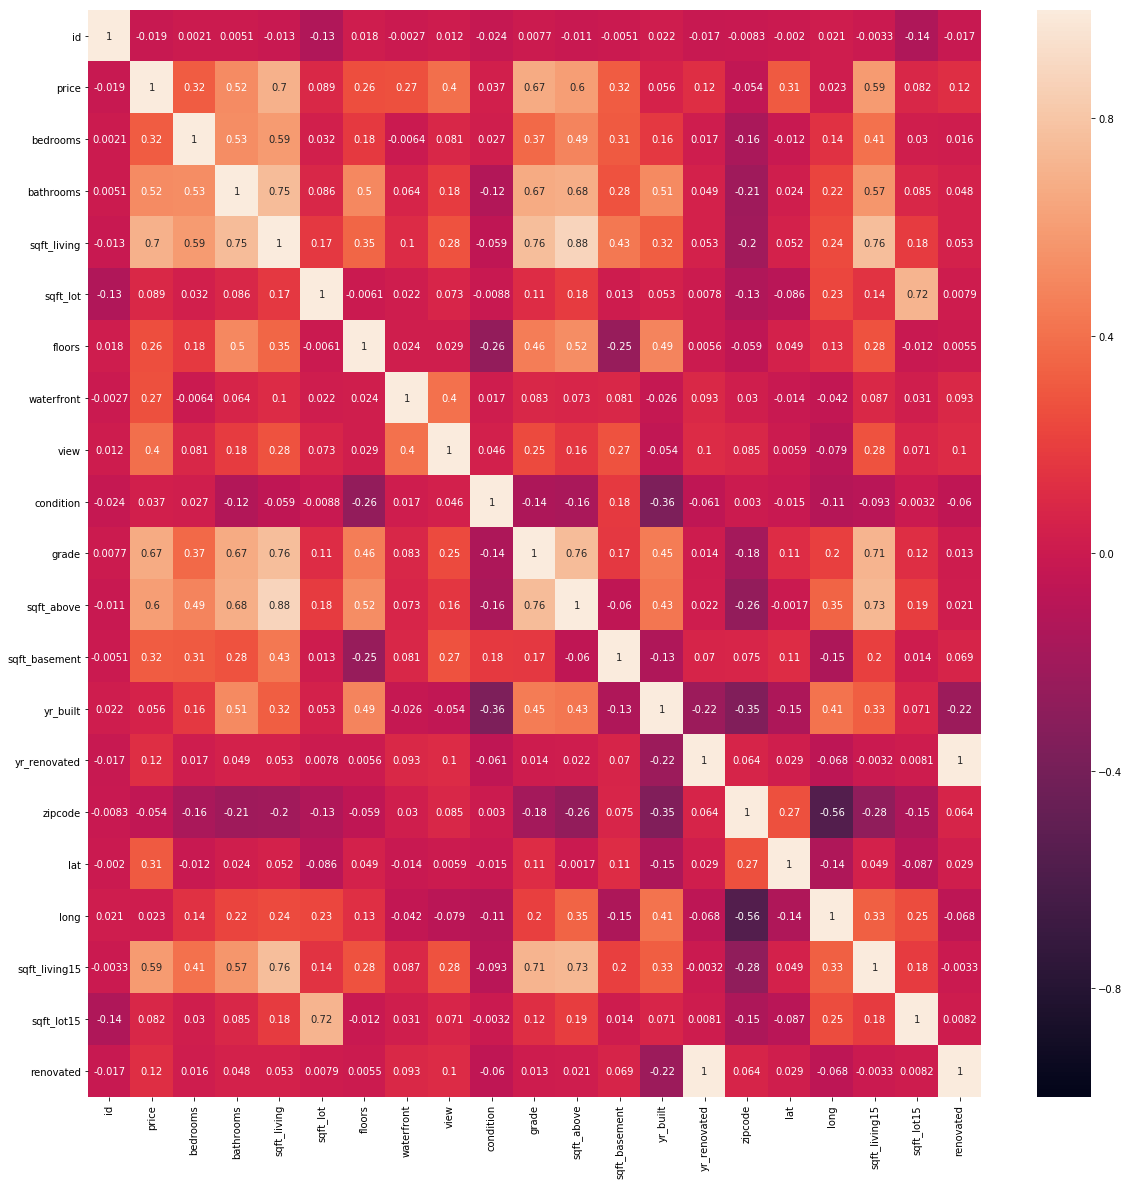

In [64]:
Corr=Data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(Corr,annot=True,vmax=1,vmin=-1)
plt.show()

Here, We See that the Maximum Correlation with the Price Label is with,
1. sqft_living
2. grade
3. sqft_above
4. sqft_living15

In [65]:
Data['renovated']=np.where(Data['yr_renovated']==0,0,1)

In [76]:
Data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

## Spliting the Data

In [103]:
# Now we will perform Linear Regression on the TOP 4 Columns of the dataset.

In [107]:
from sklearn.model_selection import train_test_split
col=['sqft_living','grade','sqft_above','sqft_living15']
X=Data[col]
Y=Data['price']
X_Train,X_Test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

## Applying Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_Train,Y_train)
Pred=LR.predict(X_Test)

## Checking the Accuracy

In [116]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Pred)
print(pow(mse,1/2))

247733.04264471828


# Linear Regression Using all Features

## Splitting Data

In [136]:
X1=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated']
X3=Data[X1]
Y1=Data['price']
X1_Train,X1_Test,Y1_train,Y1_test=train_test_split(X3,Y1,test_size=0.3,random_state=0)

## Applying Linear Regression

In [137]:
LR=LinearRegression()
LR.fit(X1_Train,Y1_train)
Pred1=LR.predict(X1_Test)


## Checking Accuracy

In [139]:
mse=mean_squared_error(Y1_test,Pred1)
print(pow(mse,1/2))

200557.94051309035


Here, We See that using all features gives usbetter results than 